# <center><mark>**`CE6501 Course Project: Group 8`**</center></mark>
<hr>

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport

from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

sns.set_style('whitegrid');
sns.set_context('notebook', font_scale=1);
sns.set_palette("Dark2")
%matplotlib inline

## 1) Importing the Dataset

In [2]:
# Importing the dataset.
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The dataset has a total of 21613 rows.

In [6]:
df.nunique()

id               21436
date               372
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

As we can observe, the id column has lesser unique values than the number of rows. This indicates that some of the houses have been sold multiple times within 2014 and 2015.

In [7]:
df.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

## 2) Exploratory Data Analysis (EDA)

### 2.1) Data Cleaning

#### 1) Dropping the 'id' column

In [8]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

#### 2) Converting the 'date' column to useful format

In [9]:
# Convert to date object
df['date'] = pd.to_datetime(df['date'])

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

df.drop('date', axis=1, inplace=True)

#### 3) Creating a new feature 'age' of the house

In [10]:
df['age'] = df['year']-df['yr_built']

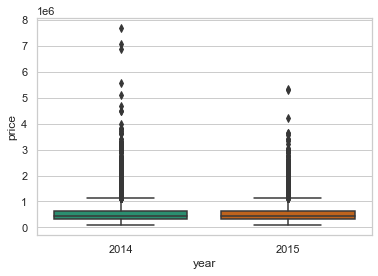

In [11]:
sns.boxplot(data = df, x = 'year', y = 'price');

# We can observe that there is not muh variation in the prices of houses sold in 2014 and 2015

In [12]:
#profile.to_notebook_iframe()

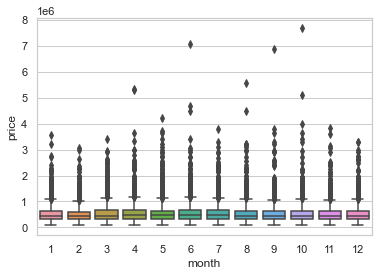

In [13]:
sns.boxplot(data = df, x = 'month', y = 'price'); # Not much difference again, can be dropped

In [14]:
# Dropping the month feature
df.drop('month', axis =1, inplace = True)

#### Creating a new column 'Renovated'

In [15]:
def renovated_(x):
    if x == 0:
        return 0
    return 1

df['renovated'] = df['yr_renovated'].apply(renovated_)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0     0          3      7  ...      1955             0    98178  47.5112   
1     0          3      7  ...      1951          1991    98125  47.7210   
2     0          3      6  ...      1933             0    98028  47.7379   
3     0          5      7  ...      1965             0    98136  47.5208   
4     0          3      8  ...      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  year  age  renovated  
0 -122.257           1340        5650  2014   59          0  
1 -122.319           1690        7639  2014   63          1  
2 -122.233           2720        8062  2015   82          0  
3 -122.393           1360        5000  2014   49          0  
4 -122.045           1800        7503  2015   28          0  

[5 rows x 22 columns]

In [16]:
df['age'] = df['year']-df['yr_built']
df[df['age']<0]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1763   597326.0         4       4.00         3570      8250     2.0   
2687   385195.0         1       1.00          710      6000     1.5   
7526   614285.0         5       2.75         2730      6401     2.0   
8039   455000.0         2       1.50         1200      1259     2.0   
14489  500000.0         2       2.25         1570      1269     2.0   
17098  350000.0         3       2.00         1380      3600     3.0   
19805  455000.0         3       1.75         1320      1014     3.0   
20770  357000.0         5       2.50         2990      9240     2.0   
20852  595000.0         4       3.25         3730      4560     2.0   
20963  230000.0         3       1.50         1040      1264     2.0   
21262  559000.0         2       3.00         1650       960     3.0   
21372  490000.0         5       3.50         4460      2975     3.0   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
1763            0     0          3     10  ...      2015             0   
2687            0     0          3      6  ...      2015             0   
7526            0     0          3      8  ...      2015             0   
8039            0     0          3      8  ...      2015             0   
14489           0     0          3      9  ...      2015             0   
17098           0     0          3      8  ...      2015             0   
19805           0     0          3      9  ...      2015             0   
20770           0     0          3      8  ...      2015             0   
20852           0     0          3      9  ...      2015             0   
20963           0     0          3      9  ...      2015             0   
21262           0     0          3      8  ...      2015             0   
21372           0     2          3     10  ...      2015             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  year  age  \
1763     98040  47.5784 -122.226           2230       10000  2014   -1   
2687     98144  47.5756 -122.316           1440        4800  2014   -1   
7526     98072  47.7685 -122.160           2520        6126  2014   -1   
8039     98144  47.6001 -122.298           1320        1852  2014   -1   
14489    98199  47.6514 -122.385           1570        6000  2014   -1   
17098    98122  47.6074 -122.305           1480        3600  2014   -1   
19805    98122  47.6047 -122.305           1380        1495  2014   -1   
20770    98133  47.7384 -122.348           1970       18110  2014   -1   
20852    98103  47.6725 -122.330           1800        4560  2014   -1   
20963    98144  47.5951 -122.301           1350        3000  2014   -1   
21262    98103  47.6611 -122.346           1650        3000  2014   -1   
21372    98119  47.6313 -122.370           2490        4231  2014   -1   

       renovated  
1763           0  
2687           0  
7526           0  
8039           0  
14489          0  
17098          0  
19805          0  
20770          0  
20852          0  
20963          0  
21262          0  
21372          0  

[12 rows x 22 columns]

In [17]:
def age_(x):
    if x == -1:
        return 1
    return x
    
df['age'] = df['age'].apply(age_)
df[df['age']<0]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, year, age, renovated]
Index: []

[0 rows x 22 columns]

In [18]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0     0          3      7  ...      1955             0    98178  47.5112   
1     0          3      7  ...      1951          1991    98125  47.7210   
2     0          3      6  ...      1933             0    98028  47.7379   
3     0          5      7  ...      1965             0    98136  47.5208   
4     0          3      8  ...      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  year  age  renovated  
0 -122.257           1340        5650  2014   59          0  
1 -122.319           1690        7639  2014   63          1  
2 -122.233           2720        8062  2015   82          0  
3 -122.393           1360        5000  2014   49          0  
4 -122.045           1800        7503  2015   28          0  

[5 rows x 22 columns]

In [19]:
print(df.columns)
print(len(list(df.columns)))

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'age', 'renovated'],
      dtype='object')
22


In [20]:
# Columns having Numerical data are
numeric_features = df.select_dtypes(include=[np.number])
print(list(numeric_features.columns))
print(len(list(numeric_features.columns)))

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age', 'renovated']
22


#### Removing anomalies in the dataset

In [21]:
# Checking for houses with either 0 bedrooms or 0 bathrooms
questionable1 = df[(df.bedrooms == 0) | (df.bathrooms == 0)]
questionable1

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
875    1100000.0         0       0.00         3064      4764     3.5   
1149     75000.0         1       0.00          670     43377     1.0   
3119    380000.0         0       0.00         1470       979     3.0   
3467    288000.0         0       1.50         1430      1650     3.0   
4868    228000.0         0       1.00          390      5900     1.0   
5832    280000.0         1       0.00          600     24501     1.0   
6994   1300000.0         0       0.00         4810     28008     2.0   
8477    339950.0         0       2.50         2290      8319     2.0   
8484    240000.0         0       2.50         1810      5669     2.0   
9773    355000.0         0       0.00         2460      8049     2.0   
9854    235000.0         0       0.00         1470      4800     2.0   
10481   484000.0         1       0.00          690     23244     1.0   
12653   320000.0         0       2.50         1490      7111     2.0   
14423   139950.0         0       0.00          844      4269     1.0   
18379   265000.0         0       0.75          384    213444     1.0   
19452   142000.0         0       0.00          290     20875     1.0   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
875             0     2          3      7  ...      1990             0   
1149            0     0          3      3  ...      1966             0   
3119            0     2          3      8  ...      2006             0   
3467            0     0          3      7  ...      1999             0   
4868            0     0          2      4  ...      1953             0   
5832            0     0          2      3  ...      1950             0   
6994            0     0          3     12  ...      1990             0   
8477            0     0          3      8  ...      1985             0   
8484            0     0          3      7  ...      2003             0   
9773            0     0          3      8  ...      1990             0   
9854            0     0          3      7  ...      1996             0   
10481           0     0          4      7  ...      1948             0   
12653           0     0          3      7  ...      1999             0   
14423           0     0          4      7  ...      1913             0   
18379           0     0          3      4  ...      2003             0   
19452           0     0          1      1  ...      1963             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  year  age  \
875      98102  47.6362 -122.322           2360        4000  2014   24   
1149     98022  47.2638 -121.906           1160       42882  2015   49   
3119     98133  47.7145 -122.356           1470        1399  2015    9   
3467     98125  47.7222 -122.290           1430        1650  2014   15   
4868     98118  47.5260 -122.261           2170        6000  2014   61   
5832     98045  47.5316 -121.749            990       22549  2014   64   
6994     98053  47.6642 -122.069           4740       35061  2014   24   
8477     98042  47.3473 -122.151           2500        8751  2014   29   
8484     98038  47.3493 -122.053           1810        5685  2014   11   
9773     98031  47.4095 -122.168           2520        8050  2015   25   
9854     98065  47.5265 -121.828           1060        7200  2014   18   
10481    98053  47.6429 -121.955           1690       19290  2014   66   
12653    98065  47.5261 -121.826           1500        4675  2015   16   
14423    98001  47.2781 -122.250           1380        9600  2015  102   
18379    98070  47.4177 -122.491           1920      224341  2014   11   
19452    98024  47.5308 -121.888           1620       22850  2014   51   

       renovated  
875            0  
1149           0  
3119           0  
3467           0  
4868           0  
5832           0  
6994           0  
8477           0  
8484           0  
9773           0  
9854           0  
10481          0  
12653          0  
14

In [22]:
# Dropping all the houses with either bedrooms or bathrooms == 0 since it is not really possible
i = 0
for row in questionable1.index:
    df = df.drop([row])
    i += 1

print('Dropped {} rows.'.format(i))
print()
df.info();

Dropped 16 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  i

In [23]:
# Checking for houses with greater living area than their lot area
questionable2 = df[df['sqft_living'] > df['sqft_lot']]
questionable2

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
63     549000.0         3       1.75         1540      1044     3.0   
116    518500.0         3       3.50         1590      1102     3.0   
175    425000.0         3       2.50         1120      1100     2.0   
406    450000.0         3       2.00         1290      1213     3.0   
547    259950.0         2       2.00         1070       649     2.0   
...         ...       ...        ...          ...       ...     ...   
21595  520000.0         2       2.25         1530       981     3.0   
21601  467000.0         3       2.50         1425      1179     3.0   
21604  429000.0         3       2.00         1490      1126     3.0   
21607  475000.0         3       2.50         1310      1294     2.0   
21608  360000.0         3       2.50         1530      1131     3.0   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
63              0     0          3      8  ...      2014             0   
116             0     0          3      8  ...      2010             0   
175             0     0          3      8  ...      2008             0   
406             0     0          3      8  ...      2001             0   
547             0     0          3      9  ...      2008             0   
...           ...   ...        ...    ...  ...       ...           ...   
21595           0     0          3      8  ...      2006             0   
21601           0     0          3      8  ...      2008             0   
21604           0     0          3      8  ...      2014             0   
21607           0     0          3      8  ...      2008             0   
21608           0     0          3      8  ...      2009             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  year  age  \
63       98115  47.6765 -122.320           1580        3090  2014    0   
116      98103  47.6824 -122.347           1620        3166  2014    4   
175      98122  47.6106 -122.310           1590        1795  2015    7   
406      98103  47.6609 -122.344           1290        3235  2014   13   
547      98106  47.5213 -122.357           1070         928  2015    7   
...        ...      ...      ...            ...         ...   ...  ...   
21595    98103  47.6533 -122.346           1530        1282  2014    8   
21601    98125  47.6963 -122.318           1285        1253  2015    7   
21604    98144  47.5699 -122.288           1400        1230  2015    1   
21607    98116  47.5773 -122.409           1330        1265  2015    7   
21608    98103  47.6993 -122.346           1530        1509  2014    5   

       renovated  
63             0  
116            0  
175            0  
406            0  
547            0  
...          ...  
21595          0  
21601          0  
21604          0  
21607          0  
21608          0  

[788 rows x 22 columns]

In [24]:
# Dropping all the houses with living area greater than the lot area since it is not really possible
i = 0
for row in questionable2.index:
    df = df.drop([row])
    i += 1

print('Dropped {} rows.'.format(i))
print()
df.info();

Dropped 788 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20809 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20809 non-null  float64
 1   bedrooms       20809 non-null  int64  
 2   bathrooms      20809 non-null  float64
 3   sqft_living    20809 non-null  int64  
 4   sqft_lot       20809 non-null  int64  
 5   floors         20809 non-null  float64
 6   waterfront     20809 non-null  int64  
 7   view           20809 non-null  int64  
 8   condition      20809 non-null  int64  
 9   grade          20809 non-null  int64  
 10  sqft_above     20809 non-null  int64  
 11  sqft_basement  20809 non-null  int64  
 12  yr_built       20809 non-null  int64  
 13  yr_renovated   20809 non-null  int64  
 14  zipcode        20809 non-null  int64  
 15  lat            20809 non-null  float64
 16  long           20809 non-null  float64
 17  sqft_living15  20809 non-null  

### 2.2) Data Visualizations

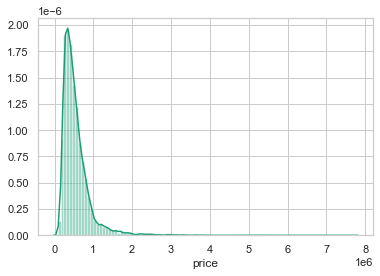

In [25]:
sns.distplot(df['price'], bins=100);

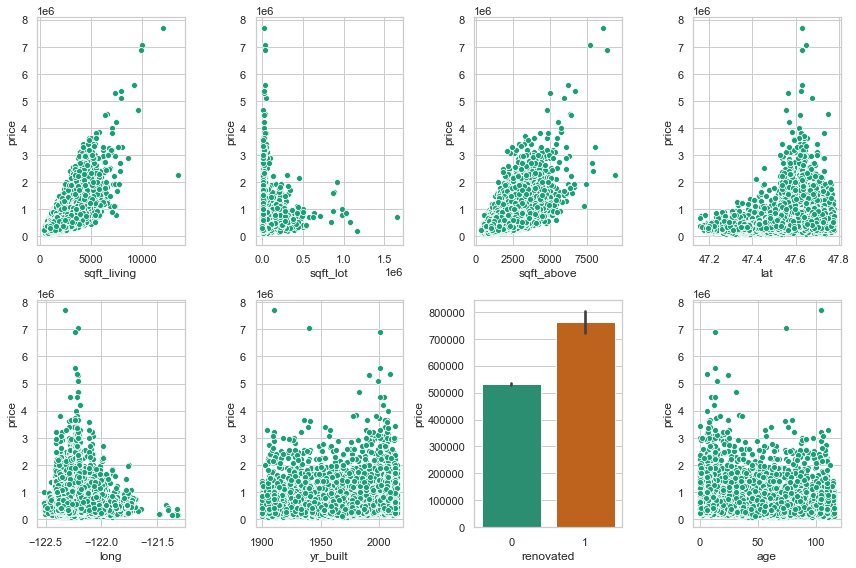

In [26]:
fig, axes = plt.subplots(2, 4,figsize=(12,8))

sns.scatterplot(x='sqft_living', y='price', data=df, ax=axes[0][0]);
sns.scatterplot(x='sqft_lot', y='price', data=df, ax=axes[0][1]);
sns.scatterplot(x='sqft_above', y='price', data=df, ax=axes[0][2]);
sns.scatterplot(x='lat', y='price', data=df, ax=axes[0][3]);
sns.scatterplot(x='long', y='price', data=df, ax=axes[1][0]);
sns.scatterplot(x='yr_built', y='price', data=df, ax=axes[1][1]);
sns.barplot(x='renovated', y='price', data=df, ax=axes[1][2]);
sns.scatterplot(x='age', y='price', data=df, ax=axes[1][3]);

plt.tight_layout();

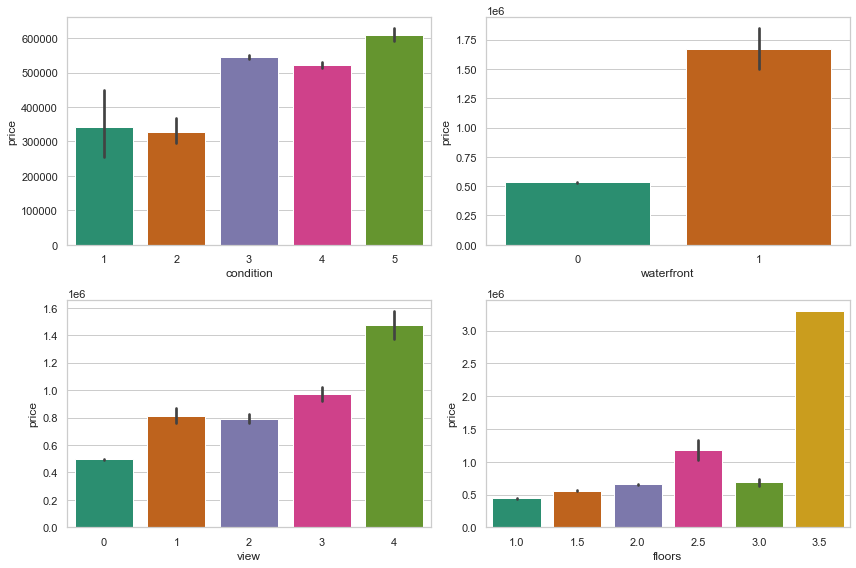

In [27]:
fig, axes = plt.subplots(2, 2,figsize=(12,8))

sns.barplot(x='condition', y='price', data=df, ax = axes[0][0]);
sns.barplot(x='waterfront', y='price', data=df, ax = axes[0][1]);
sns.barplot(x='view', y='price', data=df, ax = axes[1][0]);
sns.barplot(x='floors', y='price', data=df, ax = axes[1][1]);

plt.tight_layout();

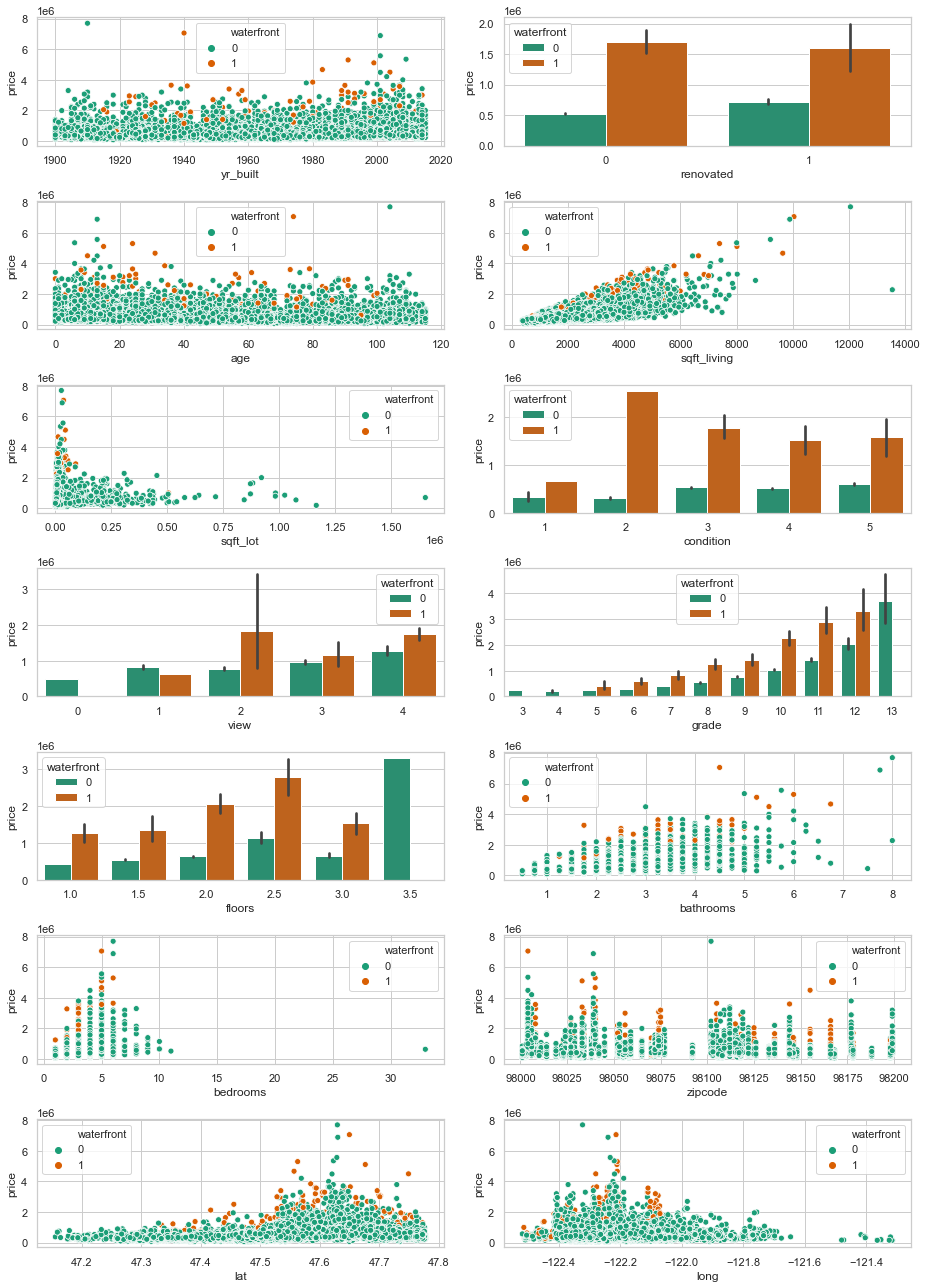

In [28]:
fig, axes = plt.subplots(7, 2,figsize=(13,18))

sns.scatterplot(x='yr_built', y='price', data=df, hue='waterfront', ax = axes[0][0]);
sns.barplot(x='renovated', y='price', data=df, hue='waterfront', ax = axes[0][1]);
sns.scatterplot(x='age', y='price', data=df, hue='waterfront', ax = axes[1][0]);
sns.scatterplot(x='sqft_living', y='price', data=df, hue='waterfront', ax = axes[1][1]);
sns.scatterplot(x='sqft_lot', y='price', data=df, hue='waterfront', ax = axes[2][0]);
sns.barplot(x='condition', y='price', data=df, hue='waterfront', ax = axes[2][1]);
sns.barplot(x='view', y='price', data=df, hue='waterfront', ax = axes[3][0]);
sns.barplot(x='grade', y='price', data=df, hue='waterfront', ax = axes[3][1]);
sns.barplot(x='floors', y='price', data=df, hue='waterfront', ax = axes[4][0]);
sns.scatterplot(x='bathrooms', y='price', data=df, hue='waterfront', ax = axes[4][1]);
sns.scatterplot(x='bedrooms', y='price', data=df, hue='waterfront', ax = axes[5][0]);
sns.scatterplot(x='zipcode', y='price', data=df, hue='waterfront', ax = axes[5][1]);
sns.scatterplot(x='lat', y='price', data=df, hue='waterfront', ax = axes[6][0]);
sns.scatterplot(x='long', y='price', data=df, hue='waterfront', ax = axes[6][1]);

plt.tight_layout();

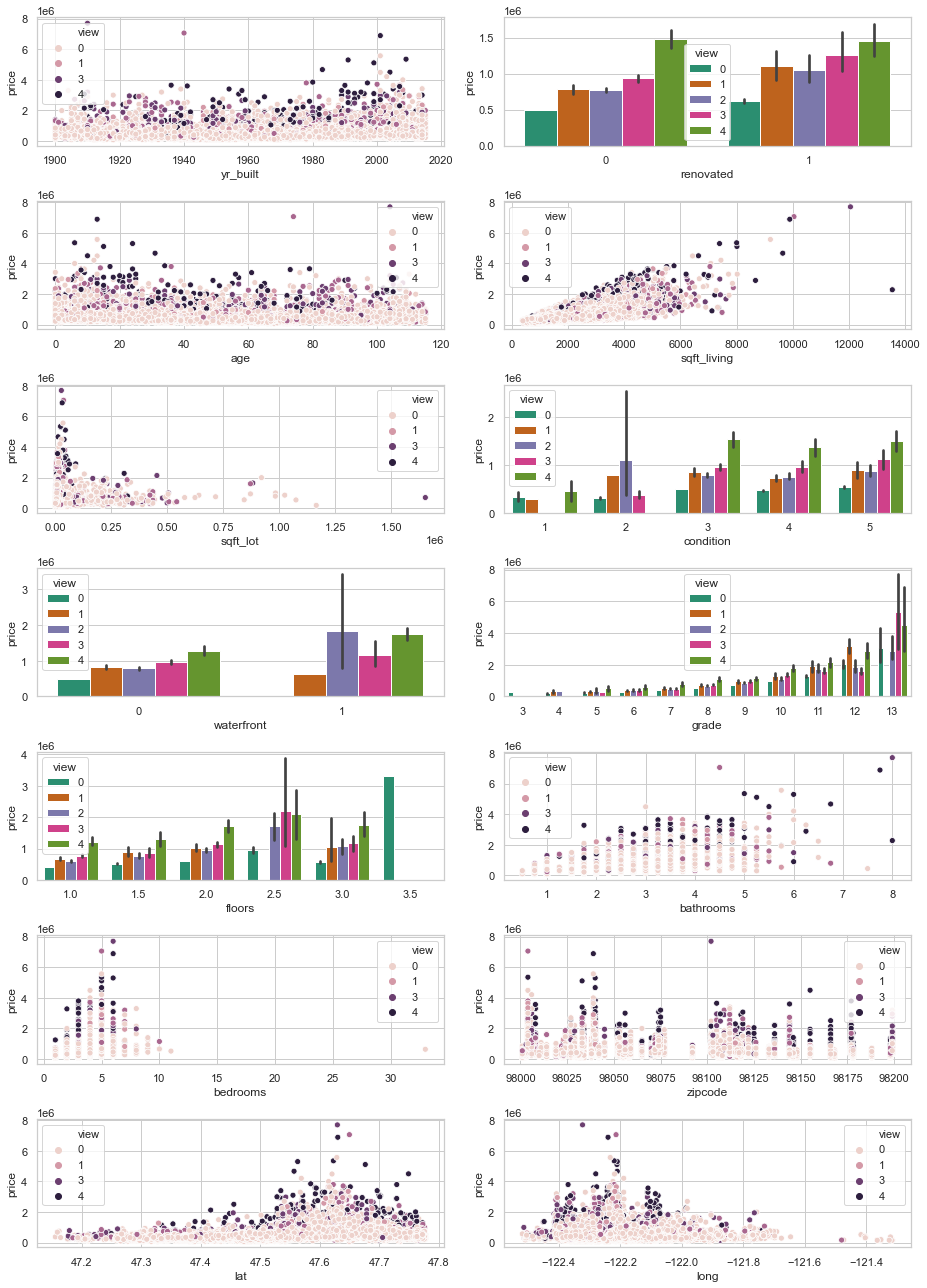

In [29]:
fig, axes = plt.subplots(7, 2,figsize=(13,18))

sns.scatterplot(x='yr_built', y='price', data=df, hue='view', ax = axes[0][0]);
sns.barplot(x='renovated', y='price', data=df, hue='view', ax = axes[0][1]);
sns.scatterplot(x='age', y='price', data=df, hue='view', ax = axes[1][0]);
sns.scatterplot(x='sqft_living', y='price', data=df, hue='view', ax = axes[1][1]);
sns.scatterplot(x='sqft_lot', y='price', data=df, hue='view', ax = axes[2][0]);
sns.barplot(x='condition', y='price', data=df, hue='view', ax = axes[2][1]);
sns.barplot(x='waterfront', y='price', data=df, hue='view', ax = axes[3][0]);
sns.barplot(x='grade', y='price', data=df, hue='view', ax = axes[3][1]);
sns.barplot(x='floors', y='price', data=df, hue='view', ax = axes[4][0]);
sns.scatterplot(x='bathrooms', y='price', data=df, hue='view', ax = axes[4][1]);
sns.scatterplot(x='bedrooms', y='price', data=df, hue='view', ax = axes[5][0]);
sns.scatterplot(x='zipcode', y='price', data=df, hue='view', ax = axes[5][1]);
sns.scatterplot(x='lat', y='price', data=df, hue='view', ax = axes[6][0]);
sns.scatterplot(x='long', y='price', data=df, hue='view', ax = axes[6][1]);

plt.tight_layout();

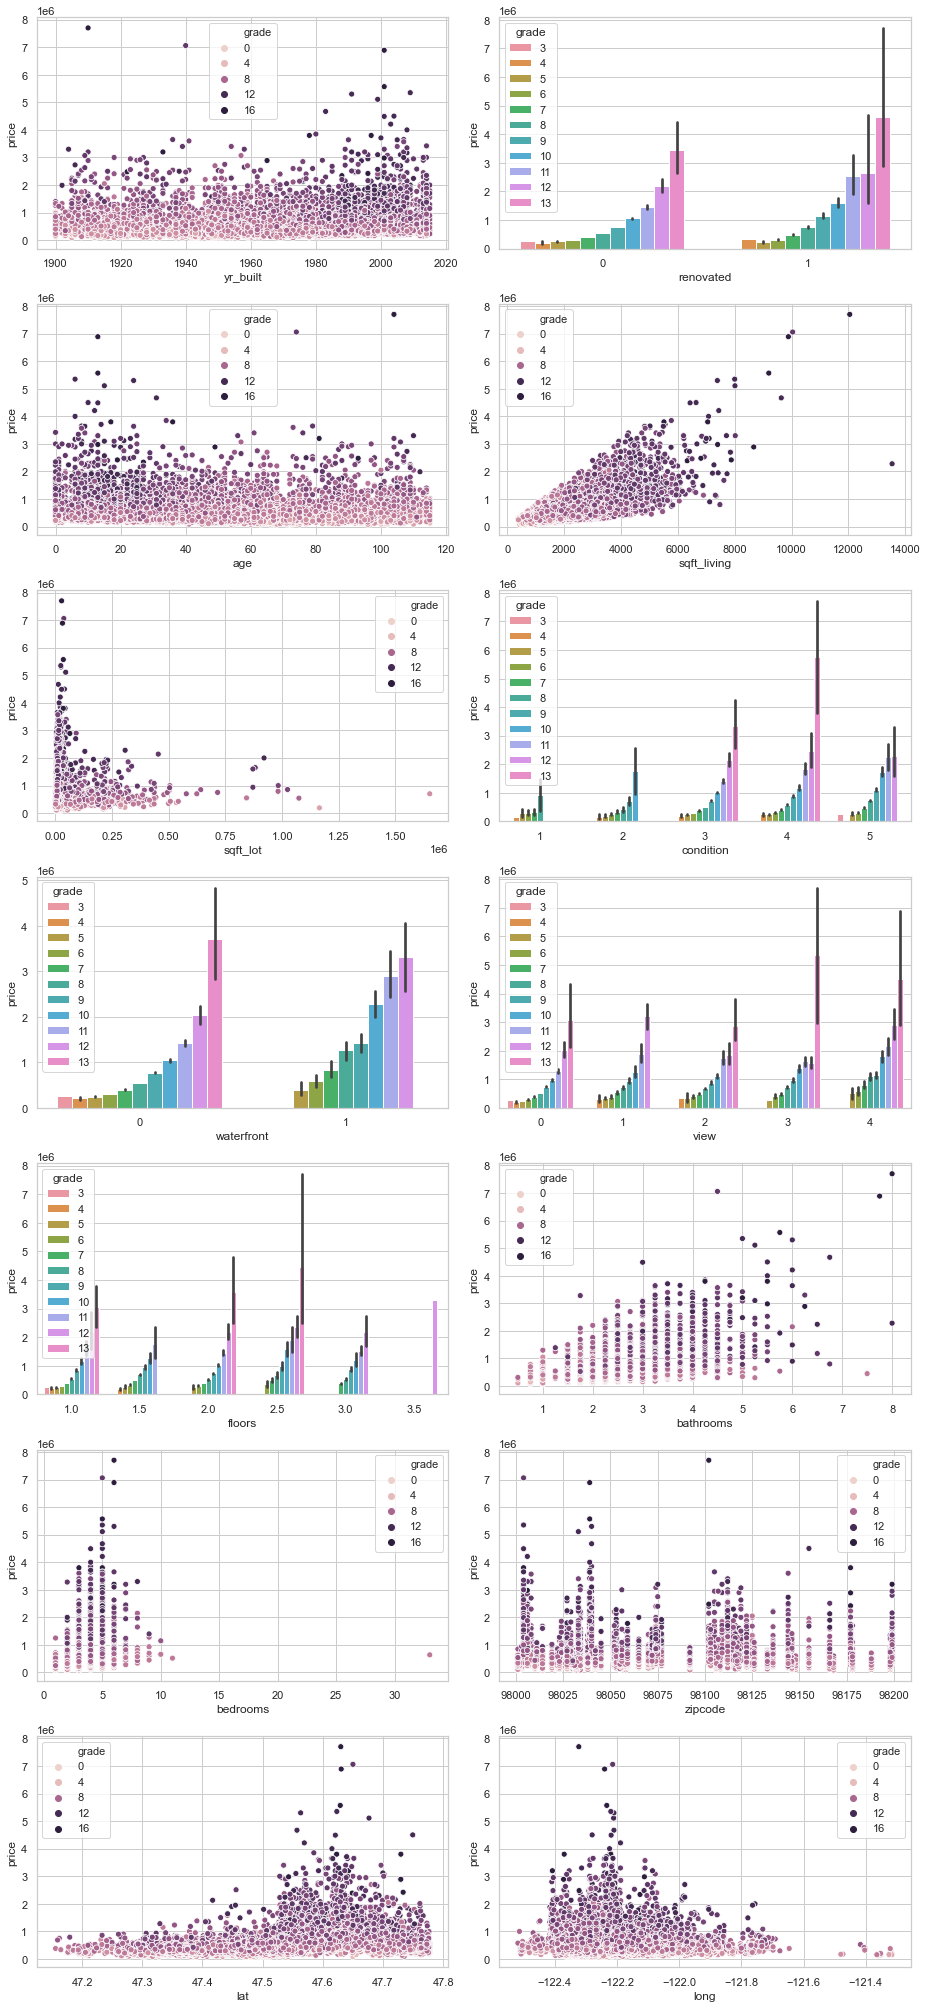

In [30]:
fig, axes = plt.subplots(7, 2,figsize=(13,28))

sns.scatterplot(x='yr_built', y='price', data=df, hue='grade', ax = axes[0][0]);
sns.barplot(x='renovated', y='price', data=df, hue='grade', ax = axes[0][1]);
sns.scatterplot(x='age', y='price', data=df, hue='grade', ax = axes[1][0]);
sns.scatterplot(x='sqft_living', y='price', data=df, hue='grade', ax = axes[1][1]);
sns.scatterplot(x='sqft_lot', y='price', data=df, hue='grade', ax = axes[2][0]);
sns.barplot(x='condition', y='price', data=df, hue='grade', ax = axes[2][1]);
sns.barplot(x='waterfront', y='price', data=df, hue='grade', ax = axes[3][0]);
sns.barplot(x='view', y='price', data=df, hue='grade', ax = axes[3][1]);
sns.barplot(x='floors', y='price', data=df, hue='grade', ax = axes[4][0]);
sns.scatterplot(x='bathrooms', y='price', data=df, hue='grade', ax = axes[4][1]);
sns.scatterplot(x='bedrooms', y='price', data=df, hue='grade', ax = axes[5][0]);
sns.scatterplot(x='zipcode', y='price', data=df, hue='grade', ax = axes[5][1]);
sns.scatterplot(x='lat', y='price', data=df, hue='grade', ax = axes[6][0]);
sns.scatterplot(x='long', y='price', data=df, hue='grade', ax = axes[6][1]);

plt.tight_layout();

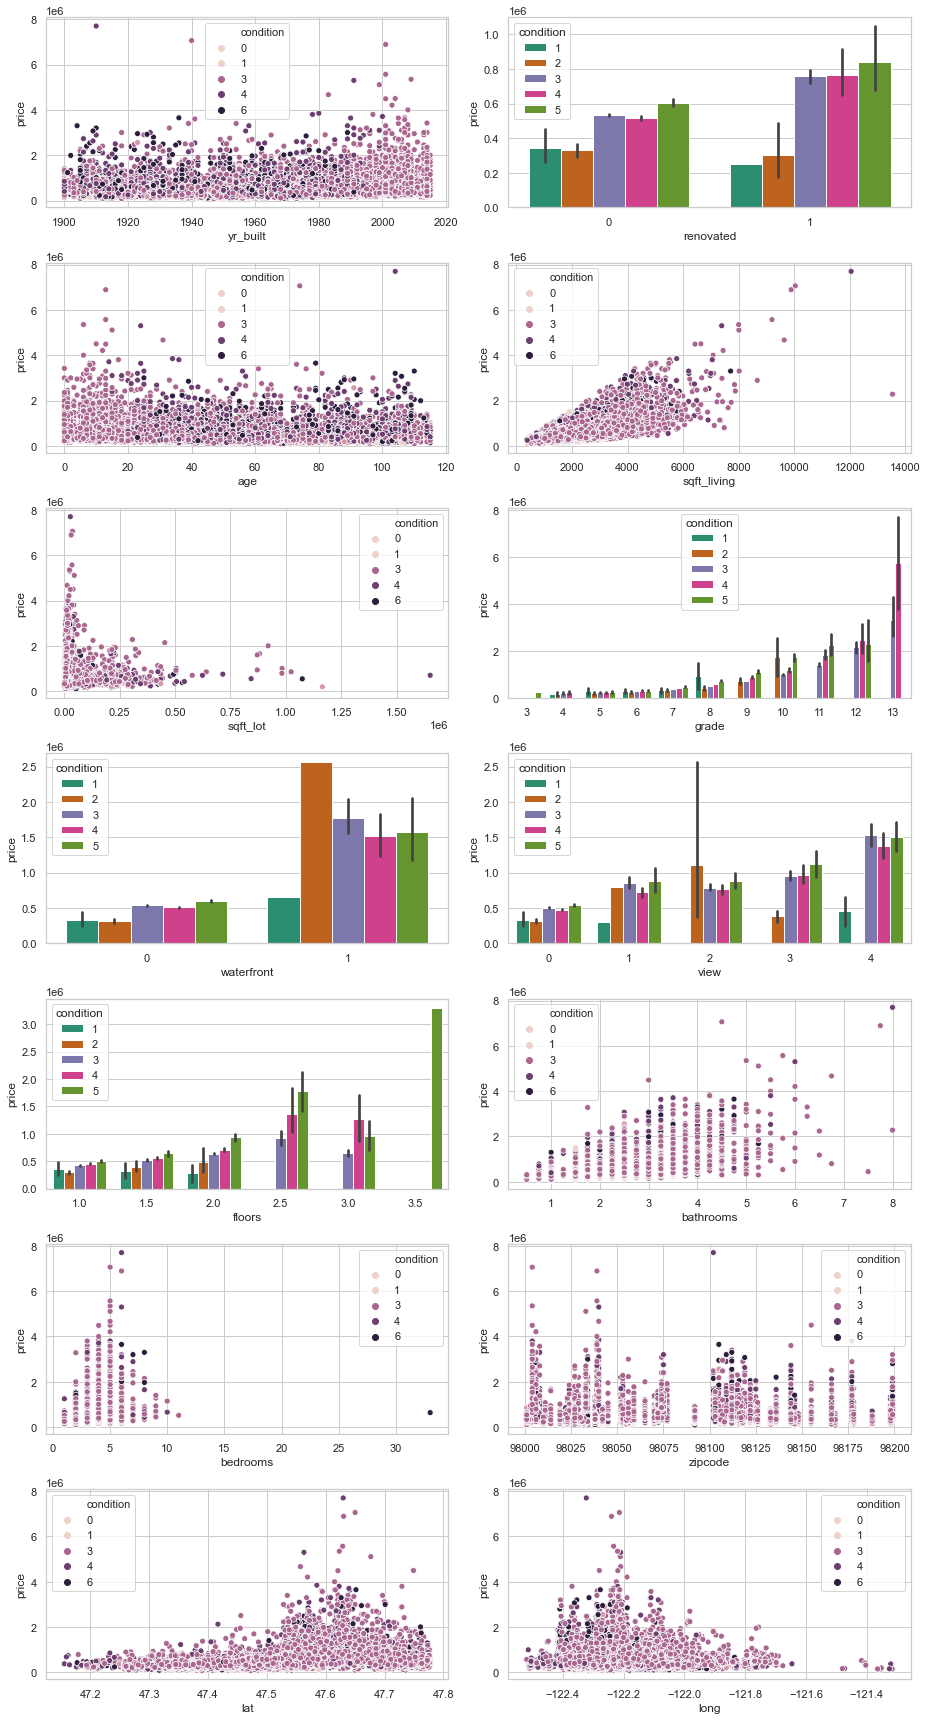

In [31]:
fig, axes = plt.subplots(7, 2,figsize=(13,24))

sns.scatterplot(x='yr_built', y='price', data=df, hue='condition', ax = axes[0][0]);
sns.barplot(x='renovated', y='price', data=df, hue='condition', ax = axes[0][1]);
sns.scatterplot(x='age', y='price', data=df, hue='condition', ax = axes[1][0]);
sns.scatterplot(x='sqft_living', y='price', data=df, hue='condition', ax = axes[1][1]);
sns.scatterplot(x='sqft_lot', y='price', data=df, hue='condition', ax = axes[2][0]);
sns.barplot(x='grade', y='price', data=df, hue='condition', ax = axes[2][1]);
sns.barplot(x='waterfront', y='price', data=df, hue='condition', ax = axes[3][0]);
sns.barplot(x='view', y='price', data=df, hue='condition', ax = axes[3][1]);
sns.barplot(x='floors', y='price', data=df, hue='condition', ax = axes[4][0]);
sns.scatterplot(x='bathrooms', y='price', data=df, hue='condition', ax = axes[4][1]);
sns.scatterplot(x='bedrooms', y='price', data=df, hue='condition', ax = axes[5][0]);
sns.scatterplot(x='zipcode', y='price', data=df, hue='condition', ax = axes[5][1]);
sns.scatterplot(x='lat', y='price', data=df, hue='condition', ax = axes[6][0]);
sns.scatterplot(x='long', y='price', data=df, hue='condition', ax = axes[6][1]);

plt.tight_layout();

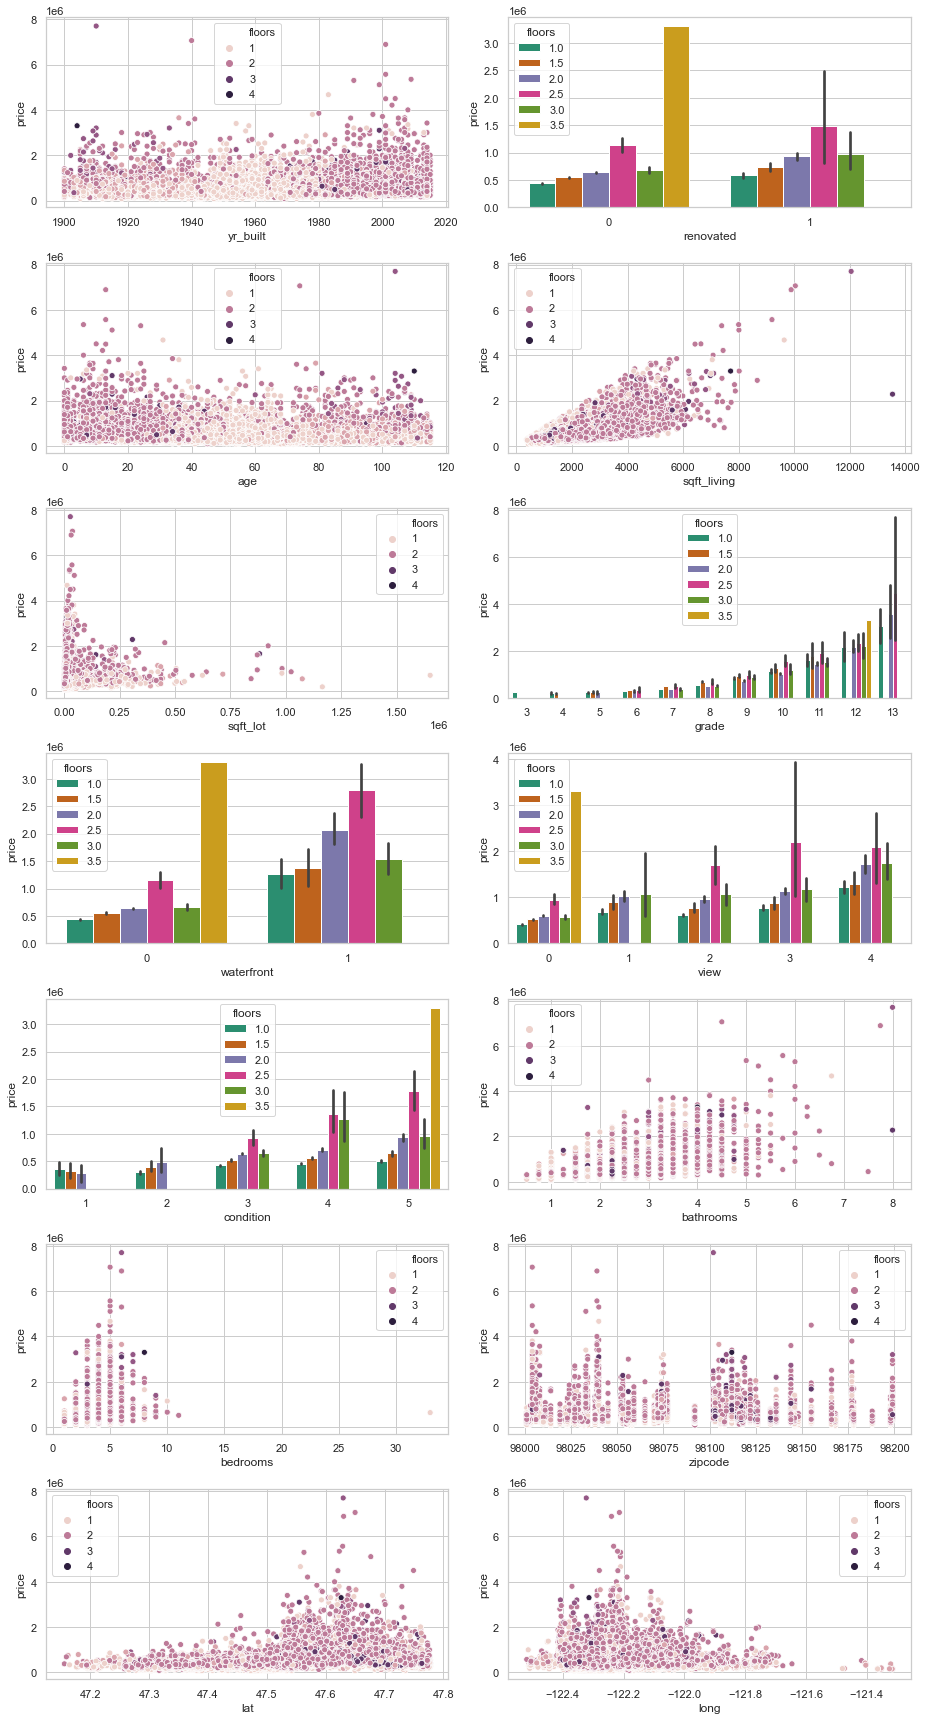

In [32]:
fig, axes = plt.subplots(7, 2,figsize=(13,24))

sns.scatterplot(x='yr_built', y='price', data=df, hue='floors', ax = axes[0][0]);
sns.barplot(x='renovated', y='price', data=df, hue='floors', ax = axes[0][1]);
sns.scatterplot(x='age', y='price', data=df, hue='floors', ax = axes[1][0]);
sns.scatterplot(x='sqft_living', y='price', data=df, hue='floors', ax = axes[1][1]);
sns.scatterplot(x='sqft_lot', y='price', data=df, hue='floors', ax = axes[2][0]);
sns.barplot(x='grade', y='price', data=df, hue='floors', ax = axes[2][1]);
sns.barplot(x='waterfront', y='price', data=df, hue='floors', ax = axes[3][0]);
sns.barplot(x='view', y='price', data=df, hue='floors', ax = axes[3][1]);
sns.barplot(x='condition', y='price', data=df, hue='floors', ax = axes[4][0]);
sns.scatterplot(x='bathrooms', y='price', data=df, hue='floors', ax = axes[4][1]);
sns.scatterplot(x='bedrooms', y='price', data=df, hue='floors', ax = axes[5][0]);
sns.scatterplot(x='zipcode', y='price', data=df, hue='floors', ax = axes[5][1]);
sns.scatterplot(x='lat', y='price', data=df, hue='floors', ax = axes[6][0]);
sns.scatterplot(x='long', y='price', data=df, hue='floors', ax = axes[6][1]);

plt.tight_layout();

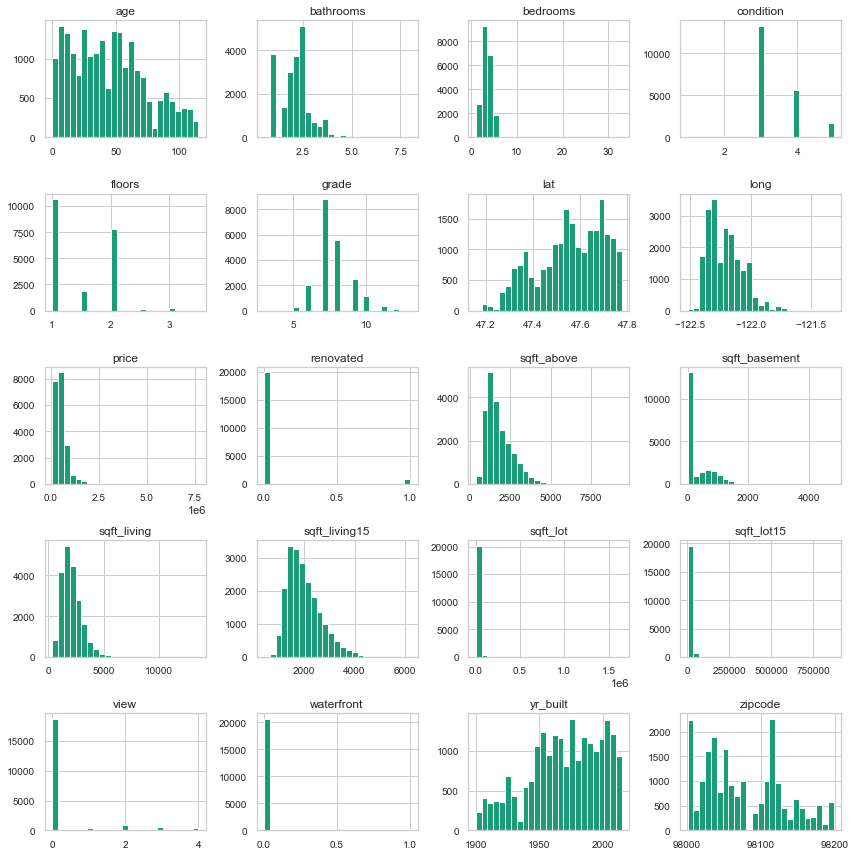

In [33]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']]

h = df1.hist(bins=25,figsize=(12,12),xlabelsize='10',ylabelsize='10')

plt.tight_layout();

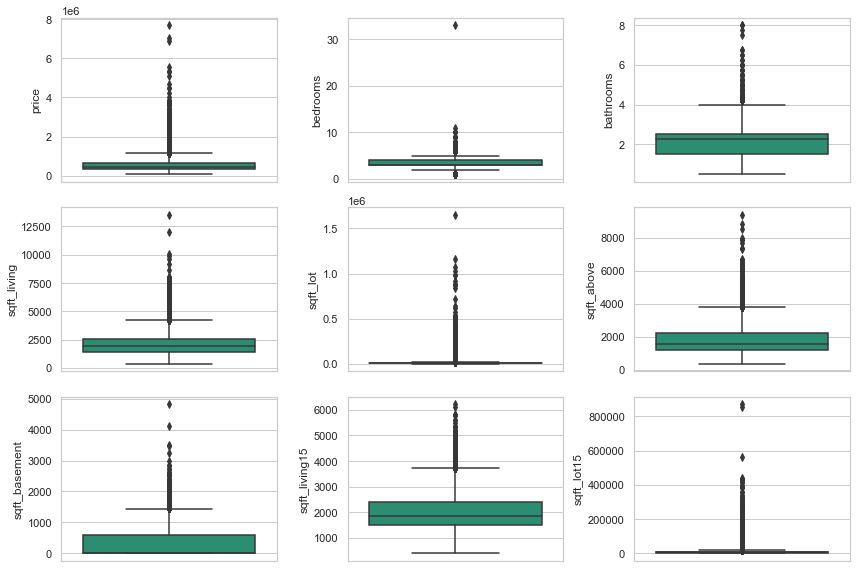

In [34]:
# Boxplots for all the contiuous numerical features
fig, axes = plt.subplots(3, 3, figsize=(12,8));

sns.boxplot(df['price'], orient='vertical', ax=axes[0][0]);
sns.boxplot(df['bedrooms'], orient='vertical', ax=axes[0][1]);
sns.boxplot(df['bathrooms'], orient='vertical', ax=axes[0][2]);
sns.boxplot(df['sqft_living'], orient='vertical', ax=axes[1][0]);
sns.boxplot(df['sqft_lot'], orient='vertical', ax=axes[1][1]);
sns.boxplot(df['sqft_above'], orient='vertical', ax=axes[1][2]);
sns.boxplot(df['sqft_basement'], orient='vertical', ax=axes[2][0]);
sns.boxplot(df['sqft_living15'], orient='vertical', ax=axes[2][1]);
sns.boxplot(df['sqft_lot15'], orient='vertical', ax=axes[2][2]);

plt.tight_layout()

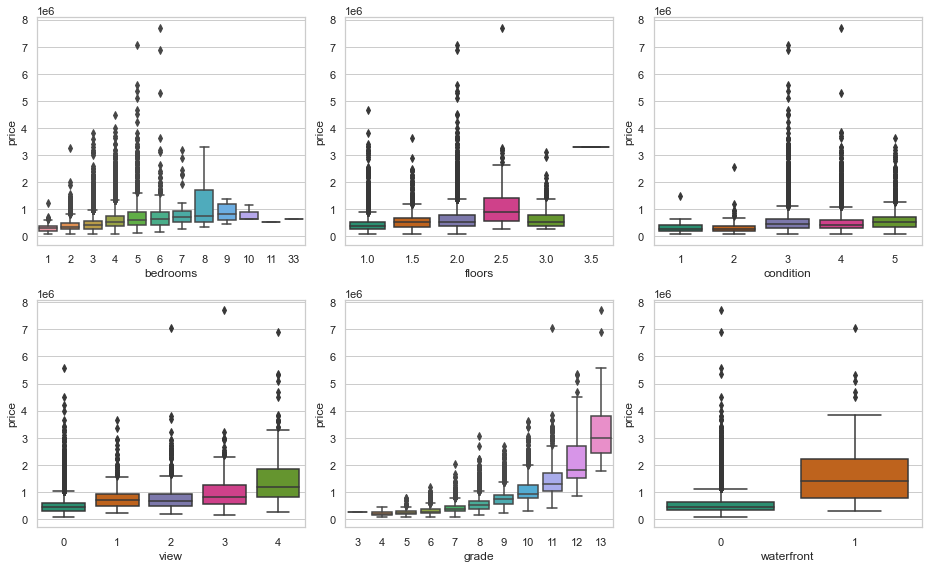

In [35]:
fig, axes = plt.subplots(2, 3,figsize=(13,8))

sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0][0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[0][1])
sns.boxplot(x=df['condition'],y=df['price'], ax=axes[0][2])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1][0])
sns.boxplot(x=df['grade'],y=df['price'], ax=axes[1][1])
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[1][2])

plt.tight_layout();

**Observations:**<br>
<ol>
    <li>The Price and grade feature clearly have some upward trend.</li>
    <li>Waterfront does affect the price levels significantly.</li>
</ol>

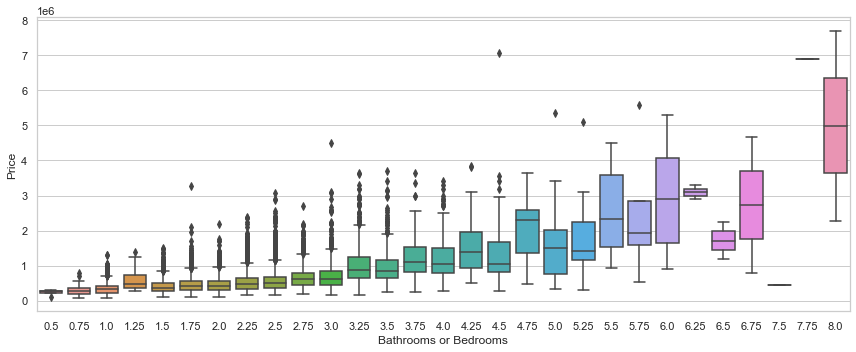

In [36]:
fig, axes = plt.subplots(1, 1,figsize=(12,5))

sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axes)
axes.set(xlabel='Bathrooms or Bedrooms', ylabel='Price');

plt.tight_layout();

**Observations:**<br>
The Price levels vary significantly with the number of Bedrooms or Bathrooms.

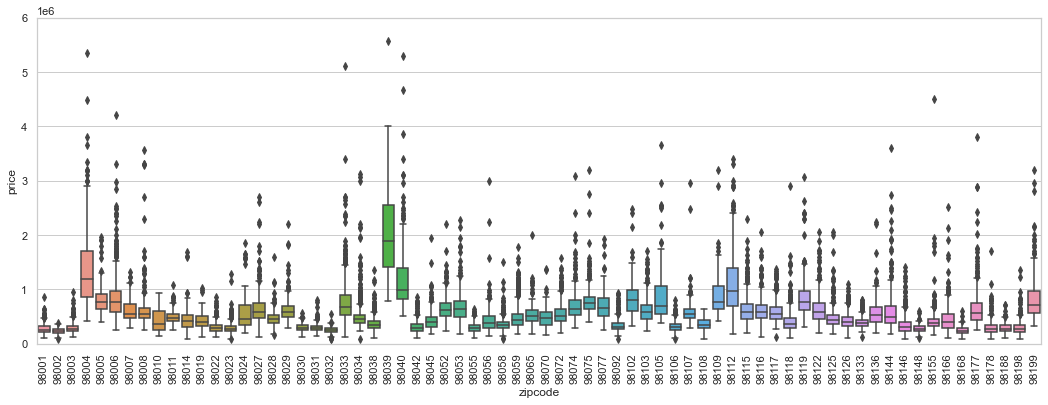

In [37]:
plt.figure(figsize=(18,6))
sns.boxplot(x=df['zipcode'], y=df['price']);
plt.xticks(rotation=90)
plt.ylim(0,6e6)
plt.show()

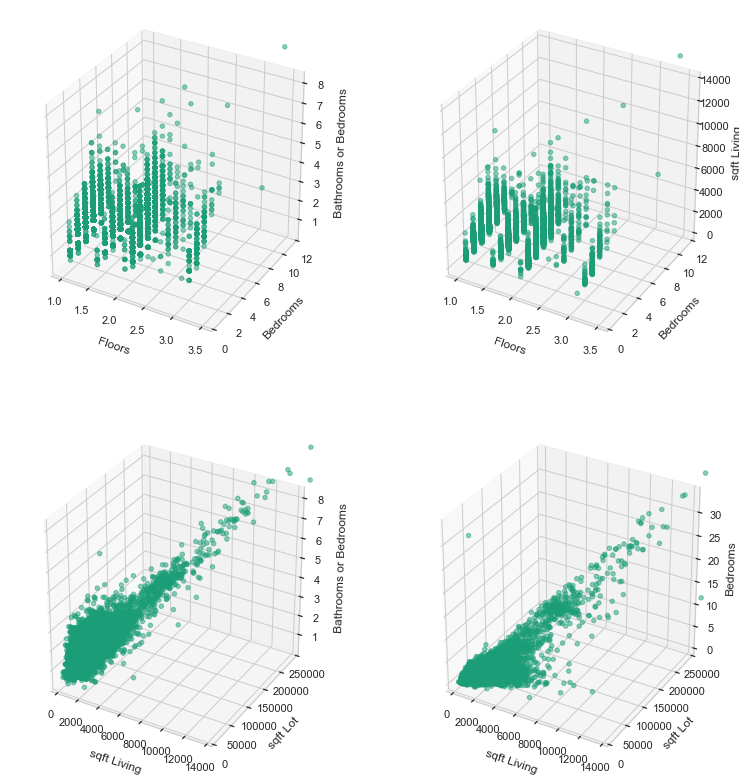

In [38]:
fig=plt.figure(figsize=(13,14))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms or Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms or Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'], alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

### 3) Data Preprocessing: Binning

In [39]:
df_dm = df.copy()

<ipython-input-40-99714d3efca7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0


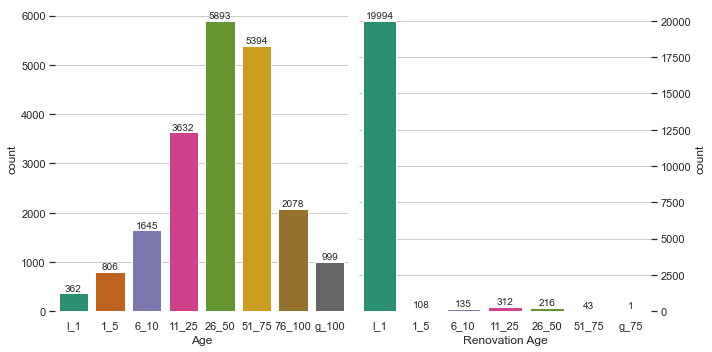

In [40]:
# just take the year of sale
df_dm['sales_yr']=df_dm['year']

# add the age of the buildings when the houses were sold as a new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['l_1','1_5','6_10','11_25','26_50','51_75','76_100','g_100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['l_1','1_5','6_10','11_25','26_50','51_75','g_75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(10,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

plt.tight_layout();

In [41]:
df_dm

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       221900.0         3       1.00         1180      5650     1.0   
1       538000.0         3       2.25         2570      7242     2.0   
2       180000.0         2       1.00          770     10000     1.0   
3       604000.0         4       3.00         1960      5000     1.0   
4       510000.0         3       2.00         1680      8080     1.0   
...          ...       ...        ...          ...       ...     ...   
21606  1010000.0         4       3.50         3510      7200     2.0   
21609   400000.0         4       2.50         2310      5813     2.0   
21610   402101.0         2       0.75         1020      1350     2.0   
21611   400000.0         3       2.50         1600      2388     2.0   
21612   325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  age_binned_51_75  \
0               0     0          3      7  ...                 1   
1               0     0          3      7  ...                 1   
2               0     0          3      6  ...                 0   
3               0     0          5      7  ...                 0   
4               0     0          3      8  ...                 0   
...           ...   ...        ...    ...  ...               ...   
21606           0     0          3      9  ...                 0   
21609           0     0          3      8  ...                 0   
21610           0     0          3      7  ...                 0   
21611           0     0          3      8  ...                 0   
21612           0     0          3      7  ...                 0   

       age_binned_76_100  age_binned_g_100  age_rnv_binned_l_1  \
0                      0                 0                   1   
1                      0                 0                   0   
2                      1                 0                   1   
3                      0                 0                   1   
4                      0                 0                   1   
...                  ...               ...                 ...   
21606                  0                 0                   1   
21609                  0                 0                   1   
21610                  0                 0                   1   
21611                  0                 0                   1   
21612                  0                 0                   1   

       age_rnv_binned_1_5  age_rnv_binned_6_10  age_rnv_binned_11_25  \
0                       0                    0                     0   
1                       0                    0                     1   
2                       0                    0                     0   
3                       0                    0                     0   
4                       0                    0                     0   
...                   ...                  ...                   ...   
21606                   0                    0                     0   
21609                   0                    0                     0   
21610                   0                    0                     0   
21611                   0                    0                     0   
21612                   0                    0                     0   

       age_rnv_binned_26_50  age_rnv_binned_51_75  age_rnv_binned_g_75  
0                         0                     0                    0  
1                         0                     0                    0  
2                         0                     0                    0  
3                         0                     0                    0  
4                         0                     0                    0  
...                     ...                   ...                  ...  
21606                     0                     0                    0  
21609                     0                     0                    0  
21610         

In [42]:
df_dm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'age', 'renovated', 'sales_yr',
       'age_rnv', 'age_binned_l_1', 'age_binned_1_5', 'age_binned_6_10',
       'age_binned_11_25', 'age_binned_26_50', 'age_binned_51_75',
       'age_binned_76_100', 'age_binned_g_100', 'age_rnv_binned_l_1',
       'age_rnv_binned_1_5', 'age_rnv_binned_6_10', 'age_rnv_binned_11_25',
       'age_rnv_binned_26_50', 'age_rnv_binned_51_75', 'age_rnv_binned_g_75'],
      dtype='object')

### 4) Feature Engineering

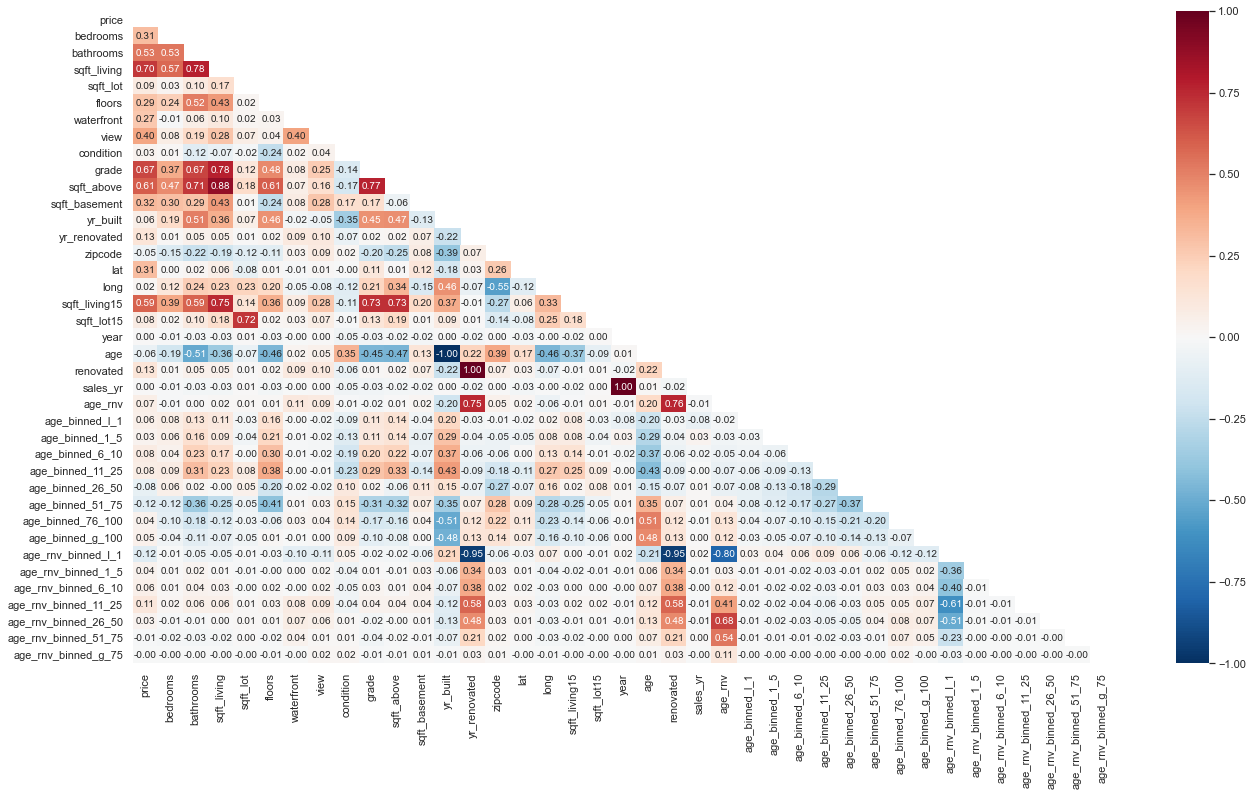

In [43]:
# The Correlation Matrix after pre-processing
plt.figure(figsize=(22,12))
mask = np.triu(np.ones_like(df_dm.corr(), dtype=bool))
sns.heatmap(df_dm.corr(), annot=True, vmin=-1,vmax=1,center=0, mask=mask, cmap='RdBu_r', fmt='.2f');

**Observations:**<br>
<ul>
    <li>The correlated features with a threshold (> 0.6 or < -0.6) are:<br>  
        (age, yr_built), (age_rnv, yr_renovated), (year, sales_yr), (sqft_living, bathrooms), (sqft_lot15, sqft_lot), (sqft_above, grade), (sqft_living15, grade), (sqft_living15, sqft_above)  </li>
    <li>The features to be dropped are:
    <ol>
        <li>yr_built</li>
        <li>yr_renovated</li>
        <li>sales_yr</li>
        <li>age</li>
        <li>age_rnv</li>
    </ol>
    </li>
</ul>

In [44]:
# Dropping the features with VIF > 5 since it indicates strong collinearity issues
df.drop(['sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'sqft_above', 'sqft_basement'], axis=1, inplace=True)

In [45]:
# Dropping the features with VIF > 5 since it indicates strong collinearity issues
df_dm.drop(['sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'sqft_above',
            'sales_yr', 'renovated', 'age_rnv','sqft_basement'], axis=1, inplace=True)

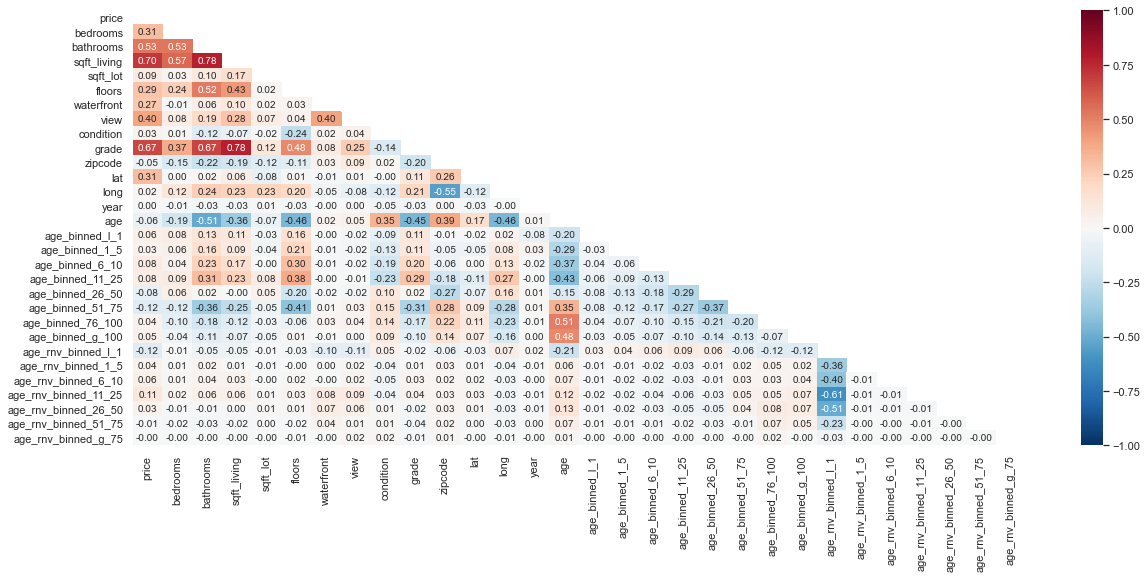

In [46]:
# The Correlation Matrix after removing correlated features
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df_dm.corr(), dtype=bool))
sns.heatmap(df_dm.corr(), annot=True, vmin=-1,vmax=1,center=0, mask=mask, cmap='RdBu_r', fmt='.2f');

### 3) Feature Ranking and Selection

In [47]:
# First extract the target variable which is our House prices
Y = df_dm.price.values
# Drop price from the house dataframe and create a matrix out of the house data

df1 = df_dm.copy()
df1.drop('price', axis=1, inplace=True)

X = df1
# Store the column/feature names into a list "colnames"
colnames = df1.columns
print(colnames)
print(len(colnames))

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'year', 'age', 'age_binned_l_1', 'age_binned_1_5', 'age_binned_6_10',
       'age_binned_11_25', 'age_binned_26_50', 'age_binned_51_75',
       'age_binned_76_100', 'age_binned_g_100', 'age_rnv_binned_l_1',
       'age_rnv_binned_1_5', 'age_rnv_binned_6_10', 'age_rnv_binned_11_25',
       'age_rnv_binned_26_50', 'age_rnv_binned_51_75', 'age_rnv_binned_g_75'],
      dtype='object')
29


### 3.1) Finding the optimal number of features

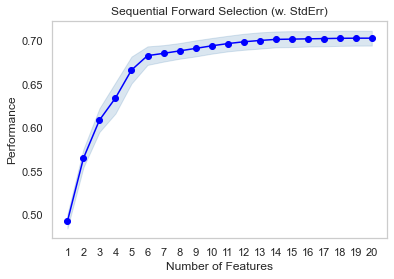

In [48]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs1 = SFS(LinearRegression(),
          k_features= (3, 20),
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5,
          n_jobs=-1)
sfs1.fit(X, Y)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### 3.2) Forward Feature Selection

In [49]:
# Sequential Forward Selection (SFS)
sfs = SFS(LinearRegression(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5,
          n_jobs=-1)

sfs.fit(X, Y)
print('SFS top 15 features:\n',sfs.k_feature_names_) # to get the final set of features

SFS top 15 features:
 ('bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long', 'year', 'age', 'age_binned_11_25', 'age_binned_26_50', 'age_binned_51_75')


### 3.3) Backward Feature Selection

In [50]:
# Backward Feature Selection (SBS)
sbs = SFS(LinearRegression(),
          k_features=15,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 5,
          n_jobs=-1)

sbs.fit(X, Y)
print('SBS top 15 features:\n',sbs.k_feature_names_) # to get the final set of features

SBS top 15 features:
 ('bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long', 'year', 'age', 'age_binned_1_5', 'age_binned_6_10', 'age_binned_26_50')


### 3.4) Bi-directional Elimination

In [51]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(),
         k_features=15,
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, Y)
print('SFFS top 15 features:\n',sffs.k_feature_names_) # to get the final set of features

SFFS top 15 features:
 ('bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long', 'year', 'age', 'age_binned_11_25', 'age_binned_26_50', 'age_rnv_binned_1_5')


### 3.4) Exhaustive Feature Selection

In [52]:
# emodel=efs(LinearRegression(), scoring='r2', n_jobs=-1, min_features=1,max_features=10, cv=5)

# emodel.fits(X, Y)
# If you see below model creates 30826 feature combinations from 10 features.Thats why its computationally very expensive.

In [ ]:
X.columns[list(emodel.best_idx_)]

### 3.5) Feature Ranking using RFE, Lasso, Ridge Regression

In [55]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [56]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Recursive Feature Elimination
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

# Using Random Forest Regressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120959804455770.94, tolerance: 287581920787.3678
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50

building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.5s finished


In [57]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))

for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	Mean
bedrooms	0.06	0.0	0.01	0.14	0.06	0.05
bathrooms	0.06	0.0	0.03	0.36	0.06	0.1
sqft_living	0.0	0.0	0.8	0.04	0.0	0.17
sqft_lot	0.0	0.0	0.07	0.0	0.0	0.01
floors	0.0	0.0	0.01	0.18	0.0	0.04
waterfront	1.0	0.0	0.09	0.46	0.98	0.51
view	0.09	0.0	0.04	0.32	0.09	0.11
condition	0.05	0.0	0.01	0.29	0.05	0.08
grade	0.18	0.0	1.0	0.39	0.18	0.35
zipcode	0.0	0.0	0.05	0.07	0.0	0.02
lat	0.99	0.0	0.51	0.43	1.0	0.59
long	0.27	0.0	0.23	0.25	0.27	0.2
year	0.05	0.0	0.01	0.21	0.05	0.06
age	0.01	0.0	0.06	0.11	0.01	0.04
age_binned_l_1	0.2	1.0	0.0	0.75	0.14	0.42
age_binned_1_5	0.15	1.0	0.0	0.68	0.1	0.39
age_binned_6_10	0.1	1.0	0.0	0.71	0.04	0.37
age_binned_11_25	0.02	1.0	0.0	0.64	0.04	0.34
age_binned_26_50	0.03	1.0	0.0	0.54	0.09	0.33
age_binned_51_75	0.02	1.0	0.0	0.5	0.03	0.31
age_binned_76_100	0.01	1.0	0.0	0.57	0.04	0.32
age_binned_g_100	0.04	1.0	0.0	0.61	0.08	0.35
age_rnv_binned_l_1	0.05	0.57	0.0	0.86	0.03	0.3
age_rnv_binned_1_5	0.12	0.57	0.0	0.93	0.14	0.35
age_rnv_binned_6_10	0.08	

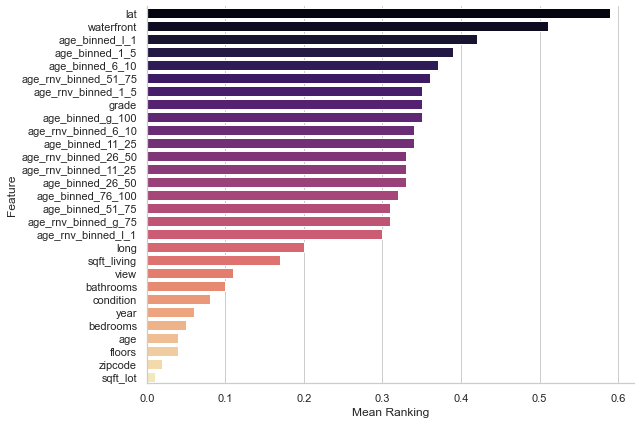

In [58]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", height=6, aspect=1.5, palette='magma');

## Model Building

In [59]:
# Top 15/29 features from Feature Selection
l = ['bedrooms', 'bathrooms', 'sqft_living', 
     'waterfront', 'view', 'condition', 'grade', 
     'zipcode', 'lat', 'long', 'year', 'age', 
     'age_binned_11_25', 'age_binned_26_50', 
     'age_rnv_binned_1_5']

### Splitting the Dataset

In [98]:
X = df_dm[l]
y = df_dm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=0.25, random_state=3)

In [99]:
for i in l:
    print(i,'+',end=' ')

bedrooms + bathrooms + sqft_living + waterfront + view + condition + grade + zipcode + lat + long + year + age + age_binned_11_25 + age_binned_26_50 + age_rnv_binned_1_5 + 

### 4.2) OLS Fit Linear Regression

In [105]:
# Using OLS Method
model_multilm = ols('price ~ bedrooms + bathrooms + sqft_living + waterfront + view + condition + grade + zipcode + lat + long + year + age ', data=df)
result_ml = model_multilm.fit()
result_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     4041.
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:10:25   Log-Likelihood:            -2.8390e+05
No. Observations:               20809   AIC:                         5.678e+05
Df Residuals:                   20796   BIC:                         5.679e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.442e+07   6.77e+06     -6.565      0.000   -5.77e+07   -3.12e+07
bedrooms    -3.495e+04   1936.773    -18.046      0.000   -3.87e+04   -3.12e+04
bathrooms    4.232e+04   3242.097     13.052      0.000     3.6e+04    4.87e+04
sqft_living   179.7826      3.199     56.202      0.000     173.513     186.053
waterfront   5.991e+05   1.77e+04     33.862      0.000    5.64e+05    6.34e+05
view         5.161e+04   2136.747     24.152      0.000    4.74e+04    5.58e+04
condition    2.167e+04   2329.196      9.304      0.000    1.71e+04    2.62e+04
grade        1.053e+05   2062.096     51.061      0.000    1.01e+05    1.09e+05
zipcode      -615.6017     33.364    -18.451      0.000    -680.997    -550.207
lat          5.945e+05   1.08e+04     54.828      0.000    5.73e+05    6.16e+05
long        -1.772e+05   1.29e+04    -13.782      0.000   -2.02e+05   -1.52e+05
year         2.683e+04   3028.761      8.858      0.000    2.09e+04    3.28e+04
age          2821.9354     70.512     40.021      0.000    2683.726    2960.145
==============================================================================
Omnibus:                    17418.418   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1664093.271
Skew:                           3.491   Prob(JB):                         0.00
Kurtosis:                      46.250   Cond. No.                     4.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.3) Multiple Linear Regression

In [106]:
lrmodel = LinearRegression();
lrmodel.fit(X_train, y_train);

y_predtr = lrmodel.predict(X_train)
y_predts = lrmodel.predict(X_test)

model_scoretr = lrmodel.score(X_train, y_train)
model_scorets = lrmodel.score(X_test,y_test)
r_squaretr = metrics.r2_score(y_train, y_predtr)
r_squarets = metrics.r2_score(y_test, y_predts)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print('The Report for Multiple Linear Regression Model is: \n')

print("R-Square (Train)               : ", r_squaretr)
print("R-Square (Test)                : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)

The Report for Multiple Linear Regression Model is: 

R-Square (Train)               :  0.7072070915336729
R-Square (Test)                :  0.6963400560064679

Mean Squared Error (Train)       :  38903562186.13817
Mean Squared Error (Test)        :  46805178564.949936

Root Mean Squared Error (Train)  :  197239.85952676545
Root Mean Squared Error (Test)   :  216345.04515923155

Median Absolute Error (Train)    :  88388.53652091324
Median Absolute Error (Test)     :  88970.5014411062


In [107]:
# A close to normal distribution of Residuals indicates correctness of the model
sns.distplot((y_test-y_predts), bins=50);
plt.xlim(-2000000, 2000000);
plt.show()

### 4.4) Random Forest Regression

In [108]:
rand_regr = RandomForestRegressor(n_estimators=400,random_state=3)
rand_regr.fit(X_train, y_train)

y_predtr = rand_regr.predict(X_train)
y_predts = rand_regr.predict(X_test)

r_squaretr = rand_regr.score(X_train, y_train)
r_squarets = rand_regr.score(X_test,y_test)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print('The Report for Random Forest Model is: \n')

print("R-Square (Train)                 : ", r_squaretr)
print("R-Square (Test)                  : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)

The Report for Random Forest Model is: 

R-Square (Train)                 :  0.9839728452139668
R-Square (Test)                  :  0.8599196065746815

Mean Squared Error (Train)       :  2129537276.5389662
Mean Squared Error (Test)        :  21591546588.24585

Root Mean Squared Error (Train)  :  46146.90971819203
Root Mean Squared Error (Test)   :  146940.62266182844

Median Absolute Error (Train)    :  14693.293750000012
Median Absolute Error (Test)     :  40131.97250000003


### 4.5) XGBoost Regression

In [109]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

y_predtr = xg.predict(X_train)
y_predts = xg.predict(X_test)

r_squaretr = xg.score(X_train, y_train)
r_squarets = xg.score(X_test,y_test)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print('The Report for XGBoost Regression is: \n')
print("R-Square (Train)                 : ", r_squaretr)
print("R-Square (Test)                  : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)

The Report for XGBoost Regression is: 

R-Square (Train)                 :  0.9690711708946834
R-Square (Test)                  :  0.8599486750930154

Mean Squared Error (Train)       :  4109531315.993269
Mean Squared Error (Test)        :  21587066059.225952

Root Mean Squared Error (Train)  :  64105.62624289126
Root Mean Squared Error (Test)   :  146925.3758178823

Median Absolute Error (Train)    :  31692.125
Median Absolute Error (Test)     :  40945.96875


### 4.6) Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.2, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

In [ ]:
lf = Lasso()
lf.fit(X_train,y_train)

print('The Report for Lasso Regression is: \n')

y_predtr = lf.predict(X_train)
y_predts = lf.predict(X_test)

r_squaretr = lf.score(X_train, y_train)
r_squarets = lf.score(X_test,y_test)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print("R-Square (Train)                 : ", r_squaretr)
print("R-Square (Test)                  : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)
print()

# Compute and print the coefficients
lf_coef = lf.coef_
print(lf_coef)

colnames = X_test.columns

# Plot the coefficients
plt.plot(range(len(colnames)), lf_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=20) 
plt.margins(0.02)
plt.show()

### 4.7) Gradient Boosting Regression

In [111]:
est = GradientBoostingRegressor(n_estimators=400, max_depth=5, 
        loss='ls',min_samples_split=2,learning_rate=0.1)
est.fit(X_train, y_train)

y_predtr = est.predict(X_train)
y_predts = est.predict(X_test)

r_squaretr = est.score(X_train, y_train)
r_squarets = est.score(X_test,y_test)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print('The Report for Gradient Boosting Regression is: \n')

print("R-Square (Train)                 : ", r_squaretr)
print("R-Square (Test)                  : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)

The Report for Gradient Boosting Regression is: 

R-Square (Train)                 :  0.9672057076628765
R-Square (Test)                  :  0.8746194520516373

Mean Squared Error (Train)       :  4357396488.769139
Mean Squared Error (Test)        :  19325759130.810413

Root Mean Squared Error (Train)  :  66010.57861259163
Root Mean Squared Error (Test)   :  139017.11812151197

Median Absolute Error (Train)    :  33133.24237665621
Median Absolute Error (Test)     :  40688.250741941156


### 4.8) Ada Boost Regression

In [ ]:
ada = AdaBoostRegressor(n_estimators=50, 
                learning_rate=0.2,loss='exponential')
ada.fit(X_train, y_train)

y_predtr = ada.predict(X_train)
y_predts = ada.predict(X_test)

r_squaretr = ada.score(X_train, y_train)
r_squarets = ada.score(X_test,y_test)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print('The Report for Ada Boost Regressor is: \n')
print("R-Square (Train)                 : ", r_squaretr)
print("R-Square (Test)                  : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)

### 4.9) Ridge Regression

In [112]:
rd = Ridge(alpha=1)
rd.fit(X_train, y_train)

y_predtr = rd.predict(X_train)
y_predts = rd.predict(X_test)

r_squaretr = rd.score(X_train, y_train)
r_squarets = rd.score(X_test,y_test)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print('The Report for Ridge Regression is: \n')
print("R-Square (Train)                 : ", r_squaretr)
print("R-Square (Test)                  : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)

The Report for Ridge Regression is: 

R-Square (Train)                 :  0.7072046960544092
R-Square (Test)                  :  0.6962794792680611

Mean Squared Error (Train)       :  38903880474.846016
Mean Squared Error (Test)        :  46814515670.860985

Root Mean Squared Error (Train)  :  197240.66638207756
Root Mean Squared Error (Test)   :  216366.6232829384

Median Absolute Error (Train)    :  88249.94670237973
Median Absolute Error (Test)     :  88804.2806622088


### 4.10) KNN Regression

In [113]:
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(X_train, y_train)

print('The Report for KNN Regression is: \n')

y_predtr = knnreg.predict(X_train)
y_predts = knnreg.predict(X_test)

r_squaretr = knnreg.score(X_train, y_train)
r_squarets = knnreg.score(X_test,y_test)
msetr = metrics.mean_squared_error(y_train, y_predtr)
msets = metrics.mean_squared_error(y_test, y_predts)
maetr = metrics.median_absolute_error(y_train, y_predtr)
maets = metrics.median_absolute_error(y_test, y_predts)

print("R-Square (Train)                 : ", r_squaretr)
print("R-Square (Test)                  : ", r_squarets)
print()
print("Mean Squared Error (Train)       : ", msetr)
print("Mean Squared Error (Test)        : ", msets)
print()
print("Root Mean Squared Error (Train)  : ", msetr**(1/2))
print("Root Mean Squared Error (Test)   : ", msets**(1/2))
print()
print("Median Absolute Error (Train)    : ", maetr)
print("Median Absolute Error (Test)     : ", maets)

The Report for KNN Regression is: 

R-Square (Train)                 :  0.6271272556954723
R-Square (Test)                  :  0.565774222777395

Mean Squared Error (Train)       :  49543816042.37343
Mean Squared Error (Test)        :  66930181087.173935

Root Mean Squared Error (Train)  :  222584.40206441563
Root Mean Squared Error (Test)   :  258708.67996102088

Median Absolute Error (Train)    :  94382.46666666667
Median Absolute Error (Test)     :  101363.33333333331
